In [1]:
import sys
import os
cwd = os.getcwd()
new_path = cwd[:-len('\\scrabble')]
if new_path not in sys.path:
    sys.path.insert(0, cwd[:-len('\\scrabble')])
from perms_and_combs.perms_and_combs import permutation_no_repetition
from trie import Trie, TrieNode 
from time import time
import matplotlib.pyplot as plt
import random
from copy import copy
import pandas as pd
import numpy as np

In [3]:
filename = 'lexicon.txt'
lexicon_file = open(filename, 'r')
lexicon = [line.rstrip() for line in lexicon_file.readlines()]

In [4]:
trie = Trie()
trie.add_words(lexicon)

In [4]:
ALPHABET = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 
           'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

In [5]:
LETTER_DISTRIBUTION = {'A': 13, 'B': 3, 'C': 3, 'D': 6, 'E': 18, 'F': 3, 
                       'G': 4, 'H': 3, 'I': 12, 'J': 2, 'K': 2, 'L': 5, 
                       'M': 3, 'N': 8, 'O': 11, 'P': 3, 'Q': 2, 'R': 9, 
                       'S': 6, 'T': 9, 'U': 6, 'V': 3, 'W': 3, 'X': 2, 
                       'Y': 3, 'Z': 2}

class Bananagrams:
    def __init__(self):
        self.bunch = copy(LETTER_DISTRIBUTION)
        
    def take_letters(self, n):
        assert sum(self.bunch.values()) >= n, "Out of letters!"
        letters = []
        for _ in range(n):
            new_letter = random.choices(list(self.bunch.keys()), weights=self.bunch.values())[0]
            letters.append(new_letter) 
            self.bunch[new_letter] -= 1
        return letters

# Brute force solution

In [33]:
def get_words(letters, word_length):
    perms = permutation_no_repetition(len(letters), word_length)
    for perm in perms:
        word = ''.join([letters[i] for i in perm])
        if word in trie:
            yield word

In [34]:
words = []
for word_length in range(1, len(letters)+1):
    start = time()
    g = list(get_words(letters, word_length))
    words += g
    end = time()
    print('Time taken for length {} is {}. Found {} words'.format(word_length, end-start, len(g)))

Time taken for length 1 is 0.0. Found 0 words
Time taken for length 2 is 0.0. Found 10 words
Time taken for length 3 is 0.0. Found 22 words
Time taken for length 4 is 0.00099945068359375. Found 16 words
Time taken for length 5 is 0.0009996891021728516. Found 0 words


In [36]:
len(words)

48

# Analysis

## Time taken

In [24]:
def time_to_find_all_words(num_letters):
    b = Bananagrams()
    start = time()
    words = list(trie.find_words(b.take_letters(num_letters)))
    return time() - start

max_word_length = 25
num_repeats = 5

df = pd.DataFrame(columns=['TIME_TAKEN', 'STD'], index=range(1, 1 + max_word_length))

for n in df.index:
    results = [time_to_find_all_words(n) for _ in range(num_repeats)]
    df.loc[n, 'TIME_TAKEN'] = np.mean(results)
    df.loc[n, 'STD'] = np.std(results)

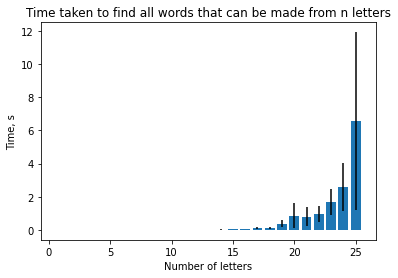

In [99]:
plt.bar(df.index, df.TIME_TAKEN, yerr=df.STD)
plt.title('Time taken to find all words that can be made from n letters')
plt.ylabel('Time, s')
plt.xlabel('Number of letters')
plt.savefig('fig1')

## word length

In [116]:
def word_length_dist(num_letters):
    b = Bananagrams()
    words = list(trie.find_words(b.take_letters(num_letters)))
    length_dist = {}
    for word in words:
        try:
            length_dist[len(word)] += 1
        except:
            length_dist[len(word)] = 1
    return length_dist

<BarContainer object of 11 artists>

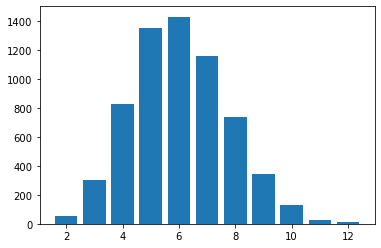

In [118]:
wld = word_length_dist(24)
plt.bar(wld.keys(), wld.values())

## word length in lexicon

In [119]:
def word_length_dist_lexicon(lexicon):
    length_dist = {}
    for word in lexicon:
        try:
            length_dist[len(word)] += 1
        except:
            length_dist[len(word)] = 1
    return length_dist

<BarContainer object of 14 artists>

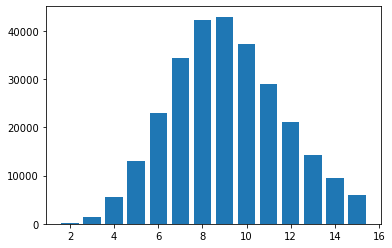

In [124]:
wldl = word_length_dist_lexicon(lexicon)
plt.bar(wldl.keys(), wldl.values())

## time to explore whole trie

In [8]:
def time_to_explore_trie(trie):
    start = time()
    trie.get_lexicon()
    return time() - start

time_to_explore_trie(trie)

0.4928407669067383

In [15]:
%load_ext line_profiler

ModuleNotFoundError: No module named 'line_profiler'

In [112]:
b = Bananagrams()
start = time()
words = list(trie.find_words(b.take_letters(10)))
print(time() - start)

0.002999544143676758


In [113]:
len(words)

386

In [114]:
max(words, key=len)

'WEEPINGS'